# Loading the important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [ ]:
file_path = 'cleaned_data/stablecoins_data_cleaned.csv'
data = pd.read_csv(file_path)

# Convert 'last_updated' to datetime if not already
data['last_updated'] = pd.to_datetime(data['last_updated'])

# Set Seaborn style
sns.set_theme(style='whitegrid')

# 1. Distribution of current prices

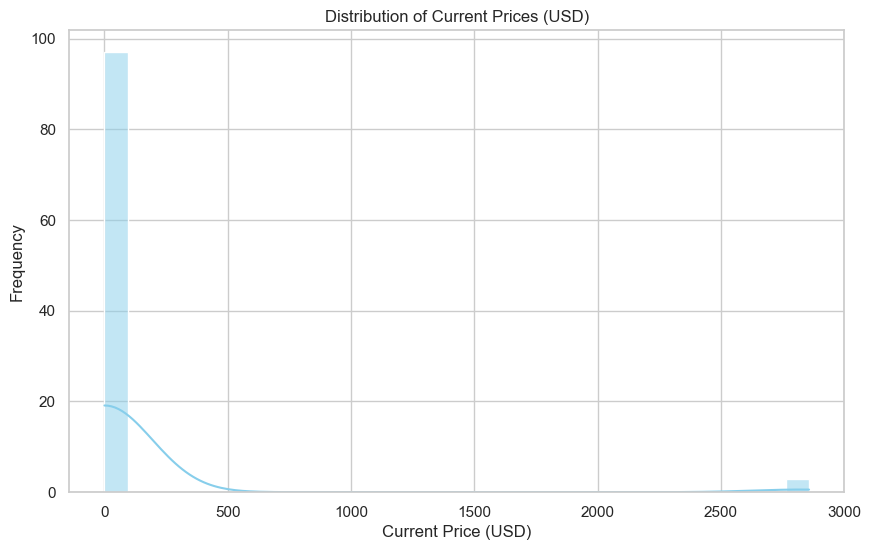

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['current_price_usd'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Current Prices (USD)')
plt.xlabel('Current Price (USD)')
plt.ylabel('Frequency')
plt.show()

**Purpose**
 - To understand the spread and skewness of current price
 - The KDE curve helps visualize the probability distribution of prices.

**Insights to Look for**
 - If the distribution is right-skewed, it indicates many low-value assets.
 - A bell-shaped curve suggests a normal distribution.

# 2. Market Cap vs Total Volume Scatter Plot

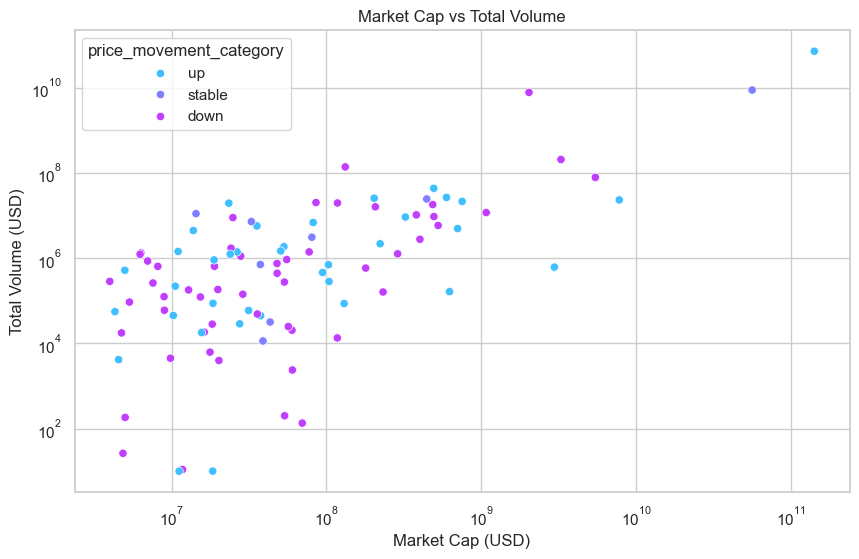

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='market_cap_usd', y='total_volume_usd', data=data, hue='price_movement_category', palette='cool')
plt.title('Market Cap vs Total Volume')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Total Volume (USD)')
plt.xscale('log')
plt.yscale('log')
plt.show()

**Purpose**
 - To examine the relationship between market cap and trading volume.
 - Uses log scale to handle large variances.
 - The hue shows price movement categories (up, down, stable).

**Insights to look for**
 - oints above the line suggest high volume for their market cap (liquid assets).
 - Clusters might indicate groups of assets with similar behavior.

# 3. Price Volatility vs Price Change Scatter Plot

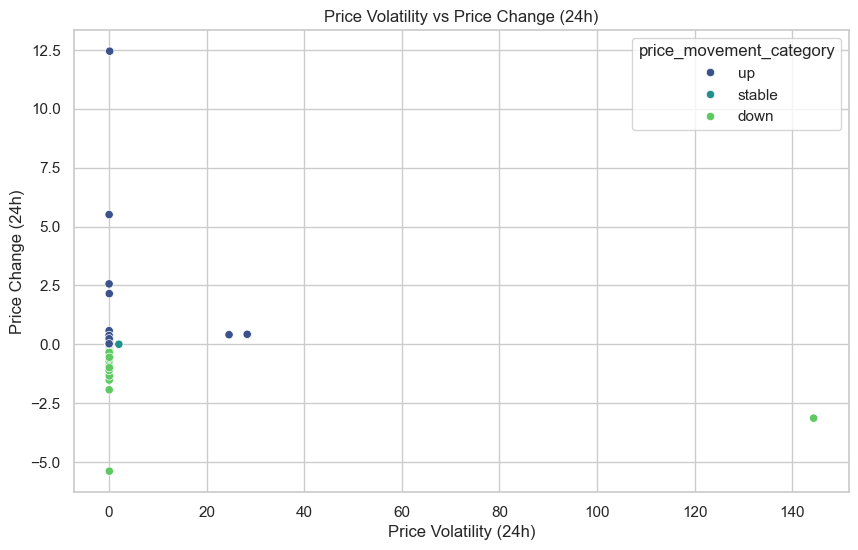

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_volatility_24h', y='price_change_24h', data=data, hue='price_movement_category', palette='viridis')
plt.title('Price Volatility vs Price Change (24h)')
plt.xlabel('Price Volatility (24h)')
plt.ylabel('Price Change (24h)')
plt.show()

**Purpose**

- To analyze if higher volatility leads to greater price changes.
- Uses hue to categorize movements.

 **Insights to Look For**

- An upward trend suggests that higher volatility correlates with greater price changes.
- Outliers might indicate unusually volatile assets.


# 4. Correlation Heatmap

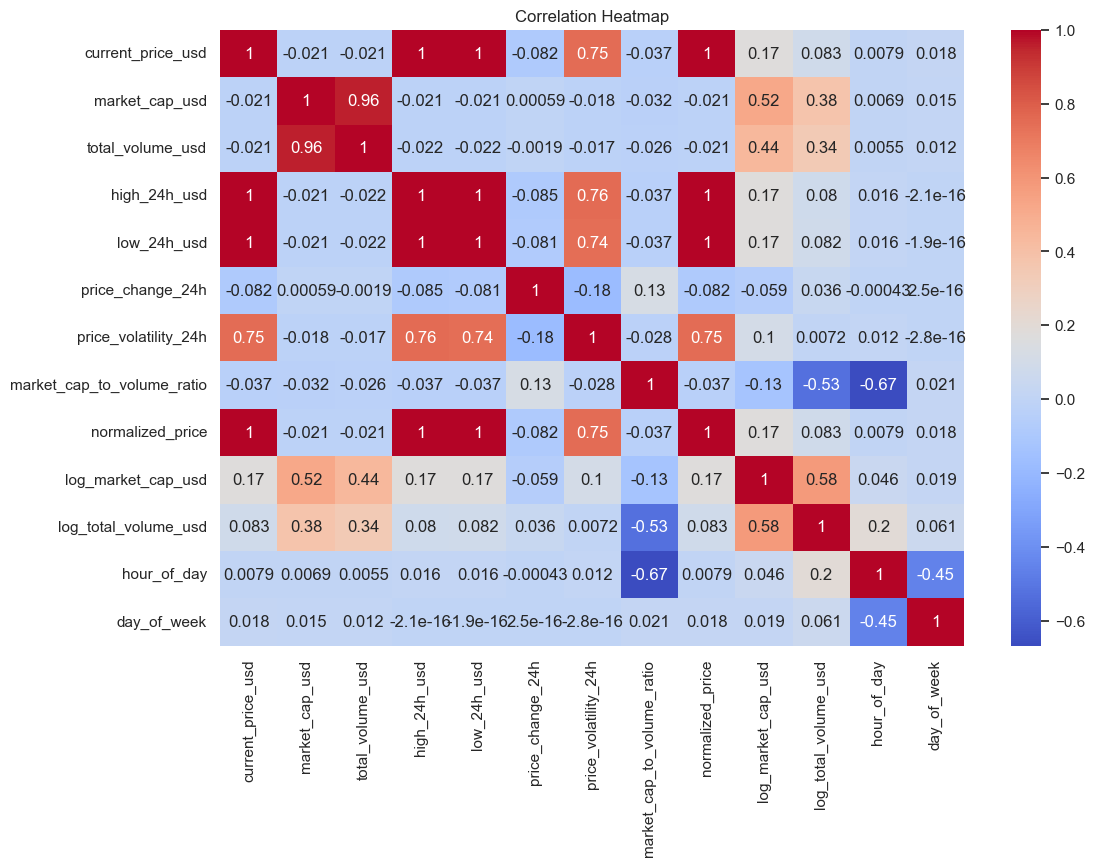

In [ ]:
num_data = data.select_dtypes(include=['int', 'float'])
correlation = num_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Purpose**

- To identify relationships between numerical features.
- Color intensity shows the strength of correlations.

**Insights to Look For**

- High positive (near +1): Strong direct relationship.
- High negative (near -1): Strong inverse relationship.
- Near 0: Little to no correlation

# 5. Box Plot of Current Price by Price Movement Category

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17772\1552949819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_movement_category', y='current_price_usd', data=data, palette='Set2')


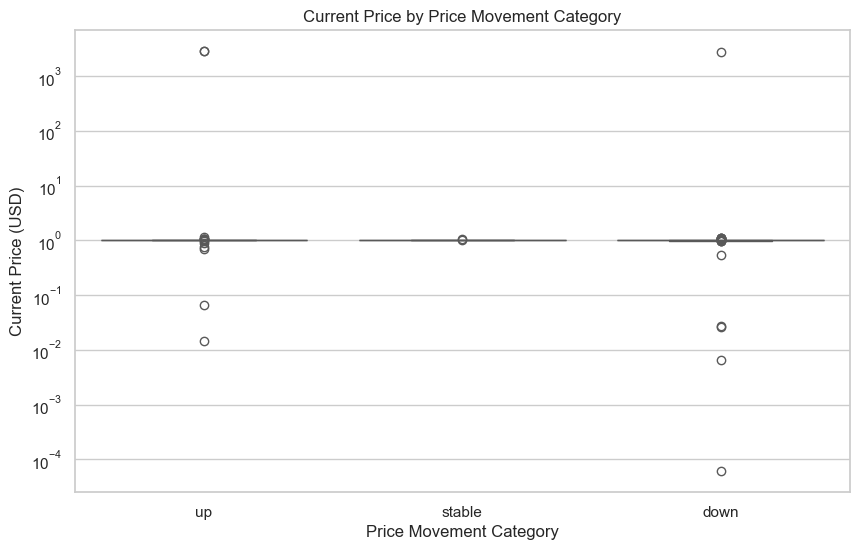

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_movement_category', y='current_price_usd', data=data, palette='Set2')
plt.title('Current Price by Price Movement Category')
plt.xlabel('Price Movement Category')
plt.ylabel('Current Price (USD)')
plt.yscale('log')
plt.show()

**Purpose**

- To compare price distributions across movement categories (up, down, stable).
- Highlights median, quartiles, and outliers.

**Insights to Look For**

- Median shifts can show price differences between categories.
- Outliers may indicate potential opportunities or risks.

# 6. Distribution of Market Cap to Volume Ratio

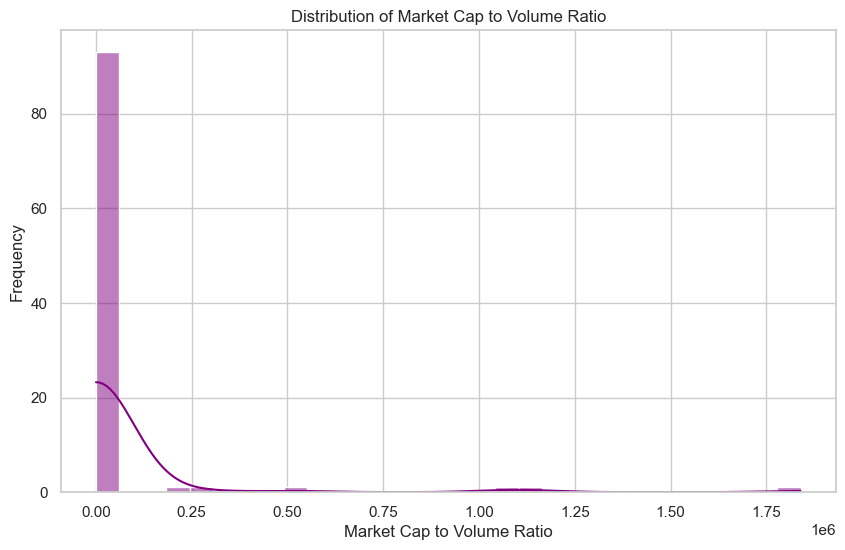

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['market_cap_to_volume_ratio'], bins=30, kde=True, color='purple')
plt.title('Distribution of Market Cap to Volume Ratio')
plt.xlabel('Market Cap to Volume Ratio')
plt.ylabel('Frequency')
plt.show()

**Purpose**

- To assess liquidity:
    - Low ratio: High trading activity (liquid).
    - igh ratio: Low trading activity (illiquid).

**Insights to Look For**

- Right-skewed: Many illiquid assets.
- Left-skewed: High liquidity across assets.


# 7. Violin Plot of Normalized Price by Day of Week

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17772\2223109763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='day_of_week', y='normalized_price', data=data, palette='muted')


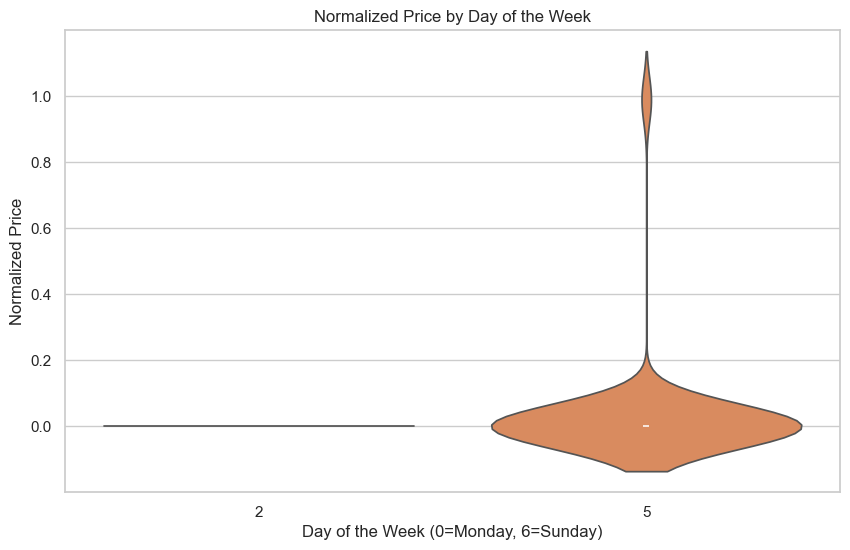

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_of_week', y='normalized_price', data=data, palette='muted')
plt.title('Normalized Price by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Normalized Price')
plt.show()

**Purpose**

- To visualize price distribution for each day of the week.
- Shows both the density and variability of prices.

**Insights to Look For**

- Wider sections: More assets at that price level.
- Day-of-week effect: Patterns may suggest trading strategies.


## These visualizations help you:

1. Understand distribution and trends.
2. Identify relationships and correlations.
3. Spot outliers and potential risks.